## revisualize reparsed TMF

In [127]:
from starling_rhythm.utils.paths import PROCESSED_DIR, ensure_dir, FIGURE_DIR
import pandas as pd
import numpy as np

In [8]:
select = pd.read_pickle(PROCESSED_DIR / 'starling_zenodo_2019_revised.pickle')

In [9]:
select

,wavs,bID,tmf,ps
0,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1053,12.943165,4.866016e-14
1,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1053,14.893108,1.127925e-15
2,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1053,20.833978,8.641643e-20
3,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1053,44.497656,1.172211e-29
4,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1053,-15.347903,4.945611e-16
...,...,...,...,...
10494,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145,54.290684,2.655114e-32
10495,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145,44.026010,1.622932e-29
10496,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145,57.855200,3.767668e-33
10497,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145,51.848247,1.089590e-31


In [137]:
from scipy.io.wavfile import read
from tqdm.autonotebook import tqdm

In [138]:
lengths = []
for i, row in tqdm(select.iterrows()):
    sr, data = read(row.wavs)
    lengths.append(len(data)/sr)

select['length'] = lengths

10499it [2:19:00,  1.26it/s]


In [139]:
select

,wavs,bID,tmf,ps,sig,bonf_p,pass_criteria,sig_pass,length
0,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1053,12.943165,4.866016e-14,True,5.108831e-10,True,True,32.589977
1,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1053,14.893108,1.127925e-15,True,1.184209e-11,True,True,67.660000
2,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1053,20.833978,8.641643e-20,True,9.072861e-16,True,True,72.780000
3,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1053,44.497656,1.172211e-29,True,1.230704e-25,True,True,165.860000
4,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1053,-15.347903,4.945611e-16,True,5.192397e-12,False,False,52.340000
...,...,...,...,...,...,...,...,...,...
10494,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145,54.290684,2.655114e-32,True,2.787605e-28,True,True,78.130000
10495,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145,44.026010,1.622932e-29,True,1.703917e-25,True,True,45.110000
10496,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145,57.855200,3.767668e-33,True,3.955674e-29,True,True,40.160000
10497,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145,51.848247,1.089590e-31,True,1.143961e-27,True,True,46.510000


In [158]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Generate example data
np.random.seed(0)
X1 = select['bID'].values
y = select['tmf'].values

# Create a DataFrame
data = pd.DataFrame({'X1': X1, 'y': y})

# Fit the OLS model
model = ols('y ~ X1', data=data).fit()

# Calculate estimated marginal means
estimates = model.get_prediction(data)
means = estimates.predicted_mean
ci = estimates.conf_int(alpha=0.05)

# Conduct pairwise tests
pairwise_results = pairwise_tukeyhsd(means, data['X1'])

# Print the results
print(pairwise_results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
  B335   B336   -0.376   0.0   -0.376   -0.376   True
  B335   B337  -1.1354   0.0  -1.1354  -1.1354   True
  B335   B338   6.1276   0.0   6.1276   6.1276   True
  B335  b1053  23.5838   0.0  23.5838  23.5838   True
  B335  b1060  25.7745   0.0  25.7745  25.7745   True
  B335  b1066   42.094   0.0   42.094   42.094   True
  B335  b1076  21.7914   0.0  21.7914  21.7914   True
  B335  b1077  22.5986   0.0  22.5986  22.5986   True
  B335  b1125  25.2153   0.0  25.2153  25.2153   True
  B335  b1143  24.2688   0.0  24.2688  24.2688   True
  B335  b1145  24.1159   0.0  24.1159  24.1159   True
  B335  b1159  24.4636   0.0  24.4636  24.4636   True
  B335  b1160  11.8126   0.0  11.8126  11.8126   True
  B336   B337  -0.7594   0.0  -0.7594  -0.7594   True
  B336   B338   6.5036   0.0   6.5036   6.5036   True
  B336  b1053  23.9598   0.0

In [156]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     649.7
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        00:47:02   Log-Likelihood:                -42306.
No. Observations:               10499   AIC:                         8.464e+04
Df Residuals:                   10485   BIC:                         8.474e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -5.5338      0.309    -17.895      0.000      -6.140      -4.928
X1[T.B336]     -0.3760      0.779     -0.483      0.629      -1.902       1.150
X1[T.B337]     -1.1354      0.769     -1.476      0.140      -2.643       0.372
X1[T.B338]      6.1276      0.879      6.972      0.000       4.405       7.850
X1[T.b1053]    23.5838      0.686     34.393      0.000      22.240      24.928
X1[T.b1060]    25.7745      0.502     51.321      0.000      24.790      26.759
X1[T.b1066]    42.0940      0.606     69.475      0.000      40.906      43.282
X1[T.b1076]    21.7914      0.470     46.320      0.000      20.869      22.714
X1[T.b1077]    22.5986      0.568     39.772      0.000      21.485      23.712
X1[T.b1125]    25.2153      0.963     26.188      0.000      23.328      27.103
X1[T.b1143]    24.2688      0.580     41.841      0.000      23.132      25.406
X1[T.b1145]    24.1159      0.629     38.340      0.000      22.883      25.349
X1[T.b1159]    24.4636      0.525     46.640      0.000      23.435      25.492
X1[T.b1160]    11.8126      0.912     12.955      0.000      10.025      13.600
==============================================================================
Omnibus:                     1770.953   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4440.412
Skew:                           0.940   Prob(JB):                         0.00
Kurtosis:                       5.573   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
select.groupby(by = 'bID')['length'].agg('sum')

bID
B335     73866.800499
B336     13126.794331
B337     14311.859297
B338      9895.379887
b1053    31112.849796
b1060    65262.559683
b1066    30302.059796
b1076    83641.409274
b1077    32804.839773
b1125    11266.629909
b1143    41970.199615
b1145    32286.569660
b1159    52700.979546
b1160    15085.139864
Name: length, dtype: float64

In [14]:
bird_average = []

for bID in np.unique(select['bID'].values):
    subframe = select[select['bID'] == bID]
    bird_average.append([np.mean(subframe['tmf']), bID])

In [15]:
bird_average.sort()
bird_average

[[-6.669193811458864, 'B337'],
 [-5.909814472735019, 'B336'],
 [-5.533798612226258, 'B335'],
 [0.5937659870076097, 'B338'],
 [6.278844918618847, 'b1160'],
 [16.257637110007536, 'b1076'],
 [17.06475817513668, 'b1077'],
 [18.05002625420797, 'b1053'],
 [18.582089397035073, 'b1145'],
 [18.734999878078796, 'b1143'],
 [18.929815666635008, 'b1159'],
 [19.681529447910016, 'b1125'],
 [20.24068582721564, 'b1060'],
 [36.56025032434481, 'b1066']]

In [17]:
alpha_list = [ls[1] for ls in bird_average]

Text(0.5, 0, 'tMF')

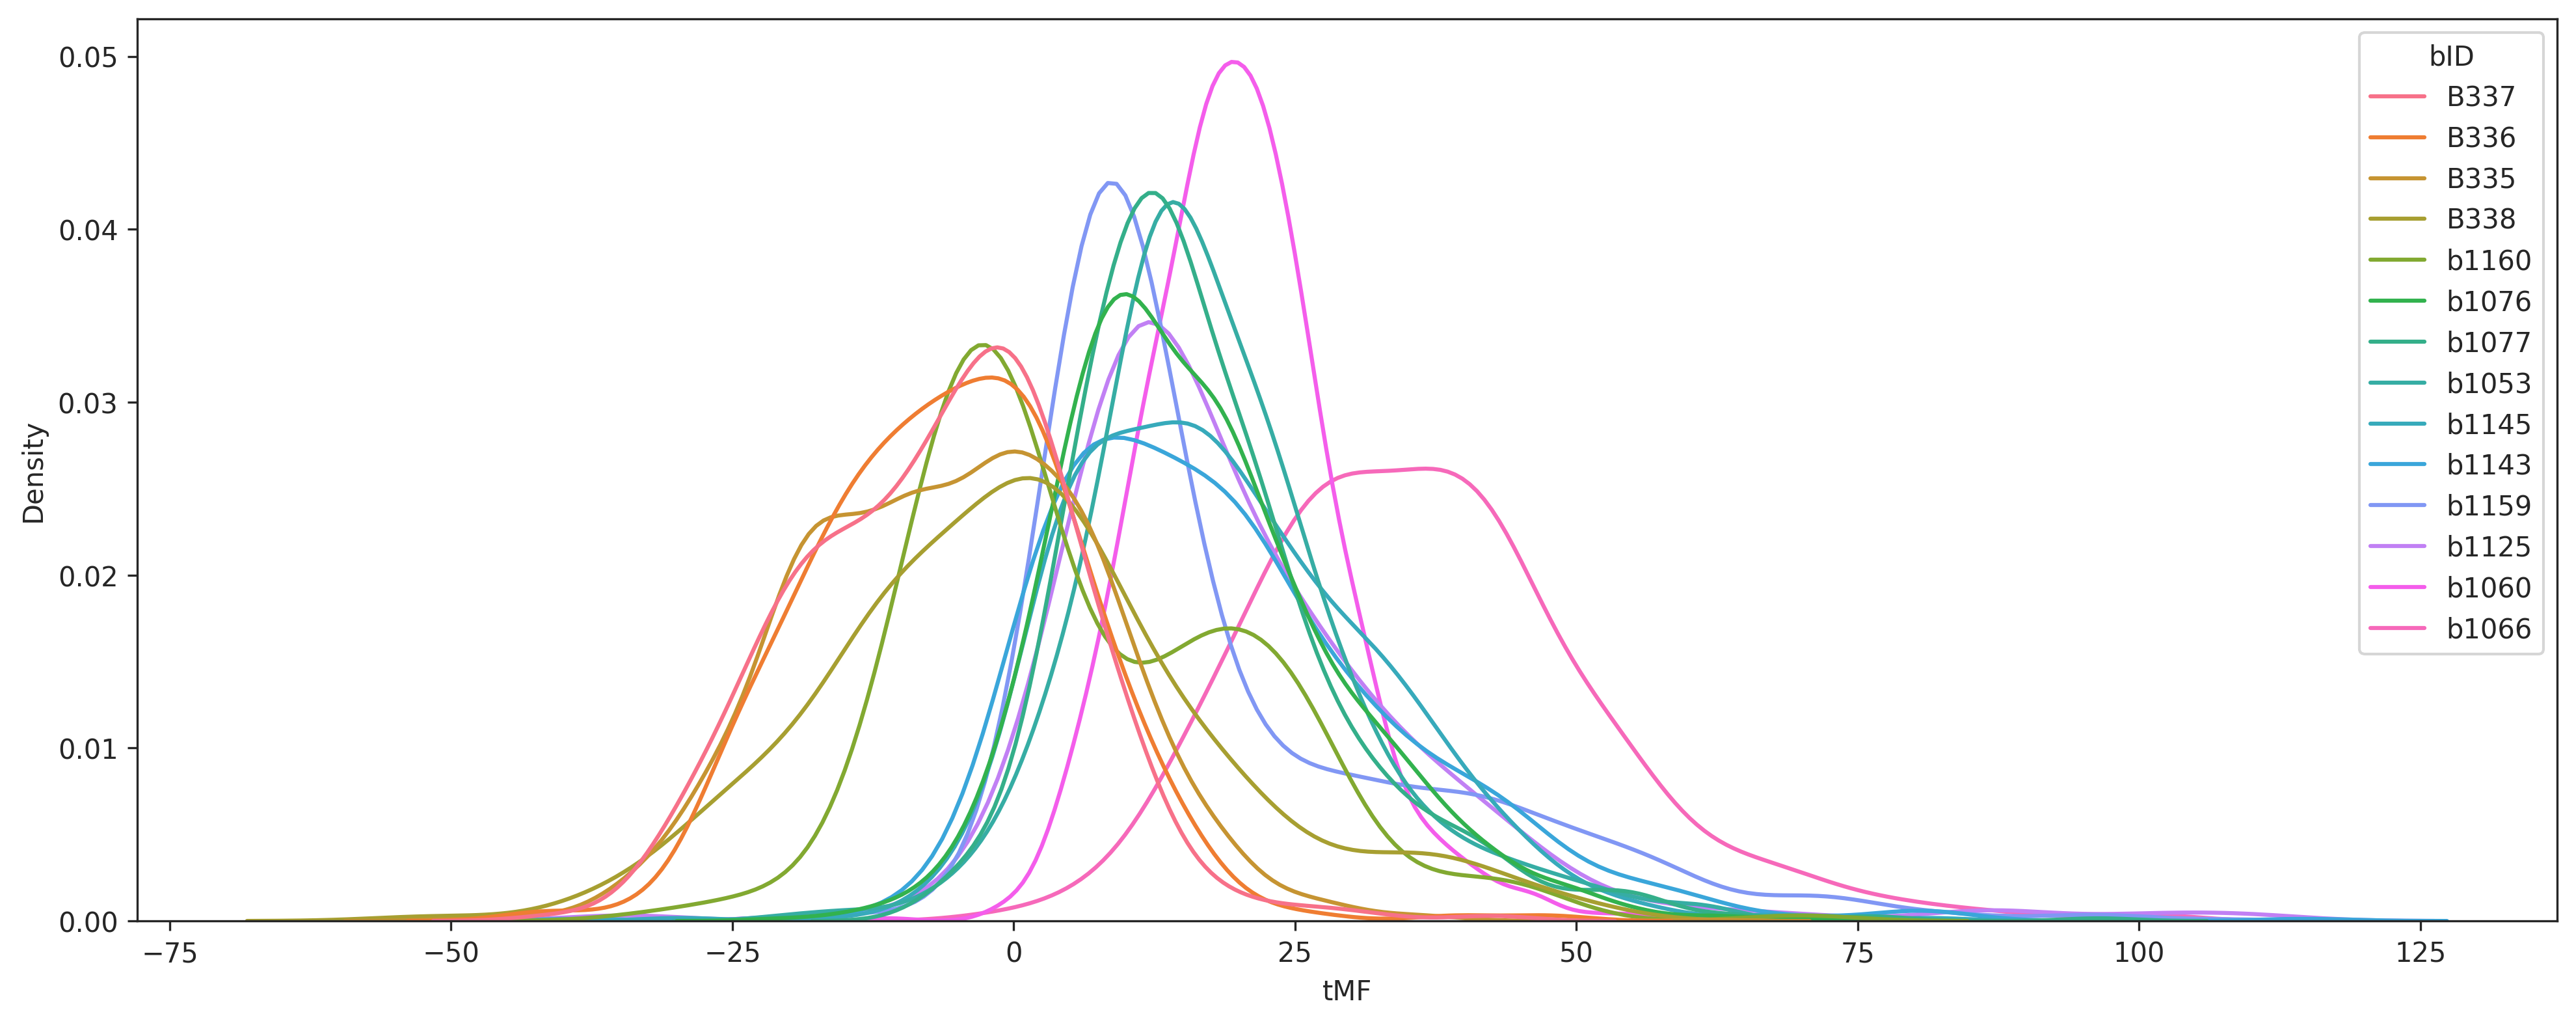

In [21]:
### distribution?
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.rcParams['patch.edgecolor'] = 'none'
figure(figsize = (16, 6), dpi = 300)
sns.set_style('ticks')


sns.kdeplot(
    data = select, 
    x = 'tmf', 
    hue = 'bID', 
    color = 'bID', 
    common_norm = False, 
    hue_order = alpha_list
)
plt.xlabel('tMF')

## Generate noise baseline

In [32]:
import colorednoise as cn

In [64]:
colors = []
sigs = []

## for every color
for beta, color in zip([1], ['pink']):
    ## generate 100
    for n in np.arange(0, 100):
        samples = 60*200 # number of samples to generate
        sigs.append(cn.powerlaw_psd_gaussian(beta, samples))
        colors.append(color)

In [65]:
noises = pd.DataFrame(
    {
        'colors' : colors,
        'sigs' : sigs
    }
)

In [66]:
noises

,colors,sigs
0,pink,"[1.5200390412942448, 0.9403039156182088, -0.00..."
1,pink,"[-0.5814303167138384, 0.09381181816479872, 0.0..."
2,pink,"[-0.48940091392344126, -0.12993619783034605, -..."
3,pink,"[-0.3895813369178916, 0.46988214489899677, 0.5..."
4,pink,"[-0.3766368685480205, -0.8575387699443077, -0...."
...,...,...
95,pink,"[2.079003689624944, 1.585098362033178, 1.33533..."
96,pink,"[-0.24986983945470367, -0.9198831746181859, -0..."
97,pink,"[-0.8440787001992973, -1.0990527321132308, -0...."
98,pink,"[0.19296289890561505, 0.3268378549299267, 0.56..."


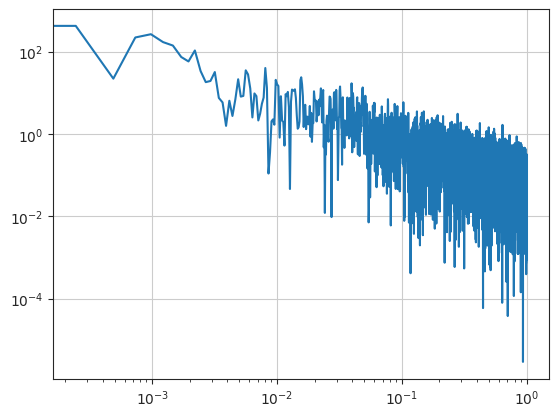

In [68]:
# optionally plot the Power Spectral Density with Matplotlib
from matplotlib import mlab
from matplotlib import pylab as plt

y = noises[noises['colors'] == 'pink'].sigs.values[0]

s, f = mlab.psd(y, NFFT=2**13)
plt.loglog(f,s)
plt.grid(True)
plt.show()

In [69]:
from joblib import Parallel, delayed
from tqdm.autonotebook import tqdm

In [70]:
from starling_rhythm.mfdfa import tmf
n_jobs = 42
verbose = 0

In [71]:
with Parallel(n_jobs = n_jobs, verbose = verbose) as parallel:
    tmfs = parallel(
        delayed(tmf)(
            address,
            ns = 32,
            amp_env_sr = 200,
            return_p = True,
            bypass_amp_env = True
        )
        for address in tqdm(noises['sigs'], desc = 'getting all the real ones')
    )

getting all the real ones: 100%|██████████| 100/100 [01:44<00:00,  1.05s/it]


In [72]:
tmfs, ps = zip(*tmfs)

In [73]:
noises['tmf'] = tmfs
noises['ps'] = ps

In [74]:
noises

,colors,sigs,tmf,ps
0,pink,"[1.5200390412942448, 0.9403039156182088, -0.00...",5.196880,1.221279e-05
1,pink,"[-0.5814303167138384, 0.09381181816479872, 0.0...",-2.637114,1.295200e-02
2,pink,"[-0.48940091392344126, -0.12993619783034605, -...",-7.217865,4.065404e-08
3,pink,"[-0.3895813369178916, 0.46988214489899677, 0.5...",-6.462928,3.310540e-07
4,pink,"[-0.3766368685480205, -0.8575387699443077, -0....",-9.055342,3.243237e-10
...,...,...,...,...
95,pink,"[2.079003689624944, 1.585098362033178, 1.33533...",-0.034482,9.727138e-01
96,pink,"[-0.24986983945470367, -0.9198831746181859, -0...",6.414927,3.789464e-07
97,pink,"[-0.8440787001992973, -1.0990527321132308, -0....",3.043414,4.736156e-03
98,pink,"[0.19296289890561505, 0.3268378549299267, 0.56...",-6.590197,2.315924e-07


In [142]:
import numpy as np
from statsmodels.stats.power import TTestPower
import matplotlib.pyplot as plt

In [144]:
solver = TTestPower()
solver.solve_power(effect_size = 0.5, nobs = 32, alpha = 0.05, power = None, alternative = "two-sided")

0.7822760037752391

## Correct both datasets with bonferroni

In [75]:
import statsmodels.stats.multitest

In [76]:
wav_bonferroni = statsmodels.stats.multitest.multipletests(select['ps'].values, alpha = 0.05, method = 'bonferroni')
select['sig'] = wav_bonferroni[0]
select['bonf_p'] = wav_bonferroni[1]

In [77]:
select.head()

,wavs,bID,tmf,ps,sig,bonf_p
0,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1053,12.943165,4.866016e-14,True,5.108831e-10
1,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1053,14.893108,1.127925e-15,True,1.184209e-11
2,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1053,20.833978,8.641643e-20,True,9.072861e-16
3,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1053,44.497656,1.172211e-29,True,1.230704e-25
4,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1053,-15.347903,4.945611e-16,True,5.192397e-12


In [78]:
noise_bonferroni = statsmodels.stats.multitest.multipletests(noises['ps'].values, alpha = 0.05, method = 'bonferroni')
noises['sig'] = noise_bonferroni[0]
noises['bonf_p'] = noise_bonferroni[1]

In [79]:
noises

,colors,sigs,tmf,ps,sig,bonf_p
0,pink,"[1.5200390412942448, 0.9403039156182088, -0.00...",5.196880,1.221279e-05,True,1.221279e-03
1,pink,"[-0.5814303167138384, 0.09381181816479872, 0.0...",-2.637114,1.295200e-02,False,1.000000e+00
2,pink,"[-0.48940091392344126, -0.12993619783034605, -...",-7.217865,4.065404e-08,True,4.065404e-06
3,pink,"[-0.3895813369178916, 0.46988214489899677, 0.5...",-6.462928,3.310540e-07,True,3.310540e-05
4,pink,"[-0.3766368685480205, -0.8575387699443077, -0....",-9.055342,3.243237e-10,True,3.243237e-08
...,...,...,...,...,...,...
95,pink,"[2.079003689624944, 1.585098362033178, 1.33533...",-0.034482,9.727138e-01,False,1.000000e+00
96,pink,"[-0.24986983945470367, -0.9198831746181859, -0...",6.414927,3.789464e-07,True,3.789464e-05
97,pink,"[-0.8440787001992973, -1.0990527321132308, -0....",3.043414,4.736156e-03,False,4.736156e-01
98,pink,"[0.19296289890561505, 0.3268378549299267, 0.56...",-6.590197,2.315924e-07,True,2.315924e-05


In [80]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [81]:
criteria = mean_confidence_interval(noises['tmf'])[2]

In [82]:
criteria

-0.6969240706212363

## In the dataset, how many are significant and also survive criteria

In [84]:
select['pass_criteria'] = select['tmf'] > criteria

In [86]:
select['sig_pass'] = select['sig'] & select['pass_criteria']

In [87]:
select

,wavs,bID,tmf,ps,sig,bonf_p,pass_criteria,sig_pass
0,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1053,12.943165,4.866016e-14,True,5.108831e-10,True,True
1,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1053,14.893108,1.127925e-15,True,1.184209e-11,True,True
2,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1053,20.833978,8.641643e-20,True,9.072861e-16,True,True
3,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1053,44.497656,1.172211e-29,True,1.230704e-25,True,True
4,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1053,-15.347903,4.945611e-16,True,5.192397e-12,False,False
...,...,...,...,...,...,...,...,...
10494,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145,54.290684,2.655114e-32,True,2.787605e-28,True,True
10495,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145,44.026010,1.622932e-29,True,1.703917e-25,True,True
10496,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145,57.855200,3.767668e-33,True,3.955674e-29,True,True
10497,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145,51.848247,1.089590e-31,True,1.143961e-27,True,True


In [149]:
np.mean(select.sig_pass)

0.6785408134108011

In [150]:
bID_passed = select.groupby('bID')['sig_pass'].agg('mean')

In [151]:
bID_passed

bID
B335     0.211965
B336     0.154270
B337     0.136364
B338     0.335766
b1053    0.894949
b1060    0.972973
b1066    0.991215
b1076    0.825763
b1077    0.878676
b1125    0.919283
b1143    0.798701
b1145    0.825243
b1159    0.845111
b1160    0.412698
Name: sig_pass, dtype: float64

## Graph with criteria

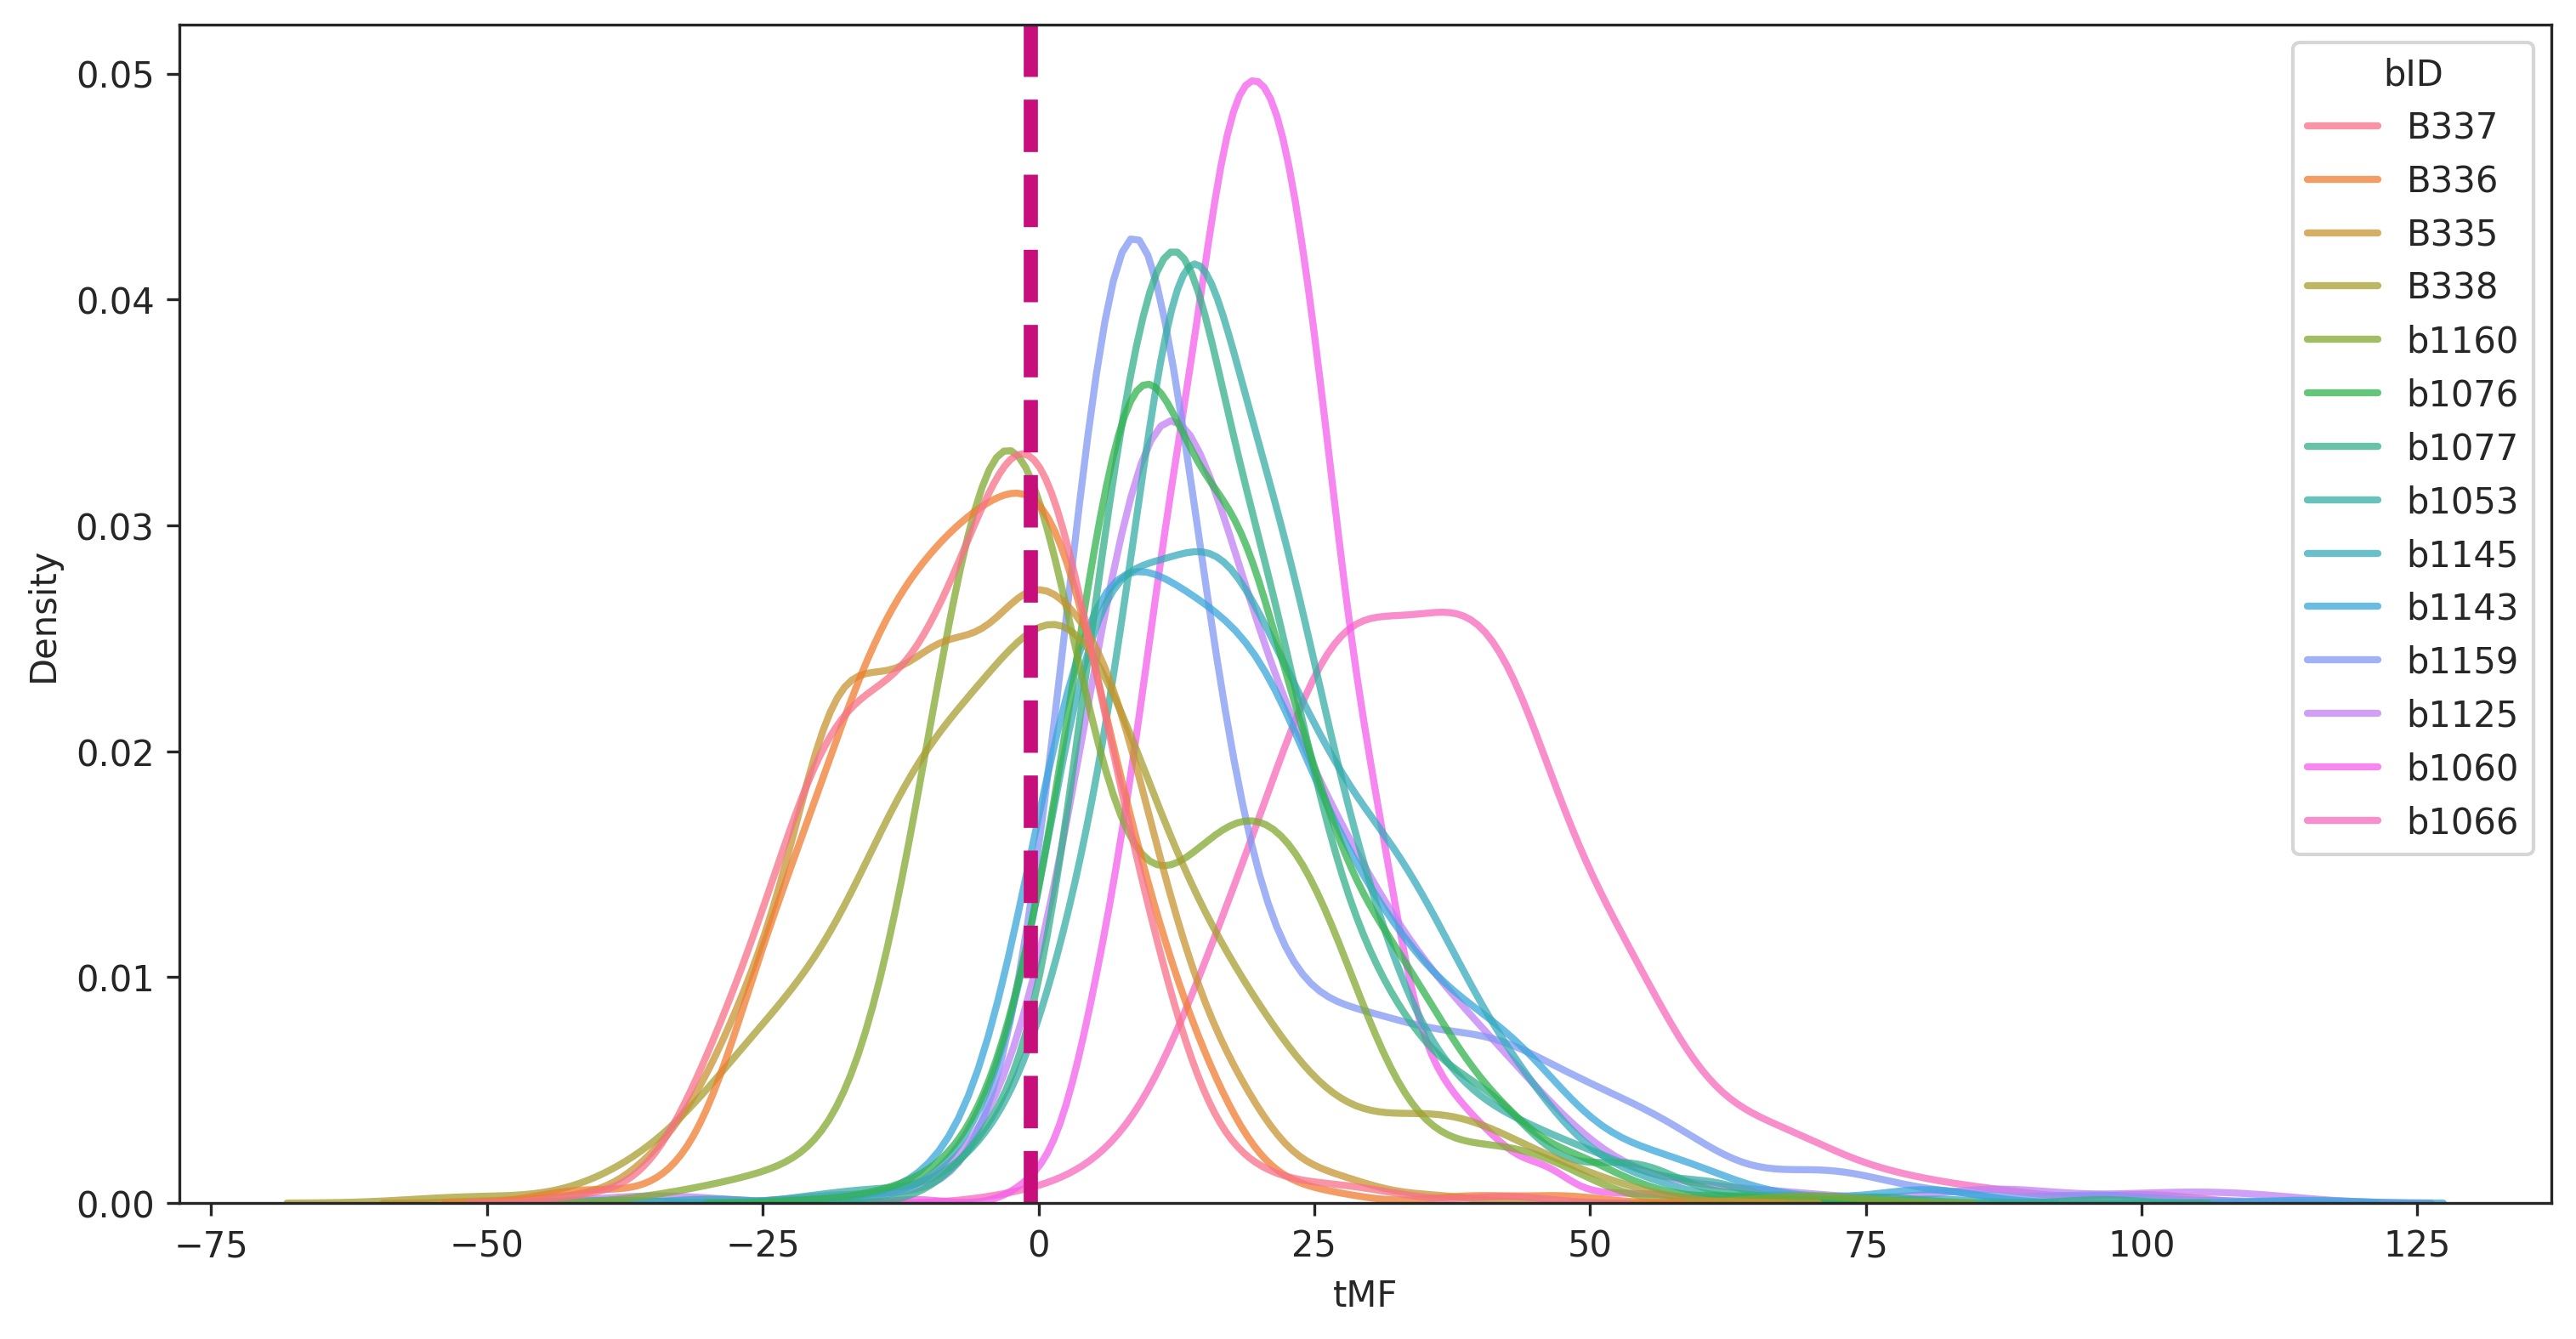

In [128]:
### distribution?
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.rcParams['patch.edgecolor'] = 'none'
figure(figsize = (12, 6), dpi = 300)
sns.set_style('ticks')

sns.kdeplot(
    data = select, 
    x = 'tmf', 
    hue = 'bID', 
    color = 'bID', 
    common_norm = False, 
    hue_order = alpha_list, 
    linewidth = 2,
    alpha = 0.75
)

plt.axvline(x=criteria, color = "#C70E7B", linewidth = 4, ls = "--")

plt.xlabel('tMF')
plt.savefig(FIGURE_DIR / 'F2_C_zenodo.pdf', dpi = 'figure', format = 'pdf', transparent = True)